Dataset loaded successfully!
Shape of the dataset: (10000, 14)
First 5 rows:
   age_days  age_years  height  weight   bmi  ap_hi  ap_lo  pulse_pressure  \
0     20987       57.5     163      80  30.1    153     96              57   
1     17483       47.9     166      79  28.7    157    102              55   
2     21790       59.7     164      60  22.3    177    121              56   
3     25550       70.0     171      83  28.4    160    123              37   
4     16972       46.5     181      52  15.9    113     61              52   

   cholesterol  glucose  smoker  alcohol_intake  active  \
0            1        2       0               0       1   
1            1        1       0               1       1   
2            2        1       0               0       0   
3            3        2       0               0       1   
4            2        1       0               0       0   

   cardiovascular_disease  
0                       1  
1                       0  
2              

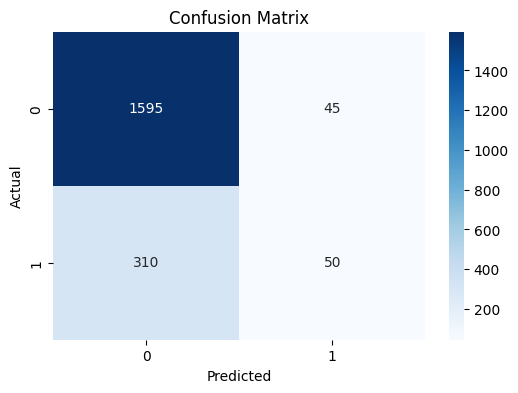

In [ ]:
# Importing required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

# ------------------------------------
# STEP 1: Load and Preprocess the Data
# ------------------------------------
def load_and_preprocess(filepath):
    # Load dataset
    data = pd.read_csv(filepath)

    # Drop 'id' column if it exists
    if 'id' in data.columns:
        data.drop('id', axis=1, inplace=True)

    print("Dataset loaded successfully!")
    print(f"Shape of the dataset: {data.shape}")
    print("First 5 rows:")
    print(data.head())

    return data

# ------------------------------------
# STEP 2: Evaluate the Model
# ------------------------------------
def evaluate_model(model, X_test, y_test):
    # Make predictions
    y_pred = model.predict(X_test)

    # Predict probabilities for ROC AUC if available
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
    else:
        y_proba = None

    # Print evaluation metrics
    print("\n--- Model Evaluation ---")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2%}")
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    # ROC AUC Score
    if y_proba is not None:
        roc_auc = roc_auc_score(y_test, y_proba)
        print(f"ROC AUC Score: {roc_auc:.2%}")

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# ------------------------------------
# STEP 3: Main Function
# ------------------------------------
def main():
    # Load data
    file_path = '/content/improved_cardiovascular_dataset.csv'
    data = load_and_preprocess(file_path)

    # Define features and target
    target_col = 'cardiovascular_disease'
    X = data.drop(target_col, axis=1)
    y = data[target_col]

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, stratify=y, random_state=42
    )

    # Feature scaling (RobustScaler works well with outliers)
    scaler = RobustScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # ------------------------------------
    # BAGGING Classifier (Base: DecisionTree)
    # ------------------------------------
    bagging_clf = BaggingClassifier(
        estimator=DecisionTreeClassifier(random_state=42),
        n_estimators=100,
        max_samples=0.8,
        max_features=1.0,
        bootstrap=True,
        random_state=42,
        n_jobs=-1
    )

    # Train the model
    bagging_clf.fit(X_train_scaled, y_train)
    print("\nBagging model trained successfully!")

    # Evaluate the model
    evaluate_model(bagging_clf, X_test_scaled, y_test)

# ------------------------------------
# Run the program
# ------------------------------------
if __name__ == "__main__":
    main()
